In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
import pandas as pd
import numpy as np
import re
from plotnine import *

In [10]:
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [11]:
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumGothic


In [30]:
pre_sale=pd.read_csv('전국_평균_분양가격_2018.7월_.csv',encoding = 'CP949')
pre_sale.shape

(2890, 5)

In [29]:
pre_sale.head(5)

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [31]:
#분양가격(㎡)은 계산을 위해 숫자형(int)로 변환이 필요
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 5 columns):
지역명        2890 non-null object
규모구분       2890 non-null object
연도         2890 non-null int64
월          2890 non-null int64
분양가격(㎡)    2750 non-null object
dtypes: int64(2), object(3)
memory usage: 113.0+ KB


In [34]:
pre_sale.dtypes

지역명        object
규모구분       object
연도          int64
월           int64
분양가격(㎡)    object
dtype: object

In [36]:
pre_sale.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    140
dtype: int64

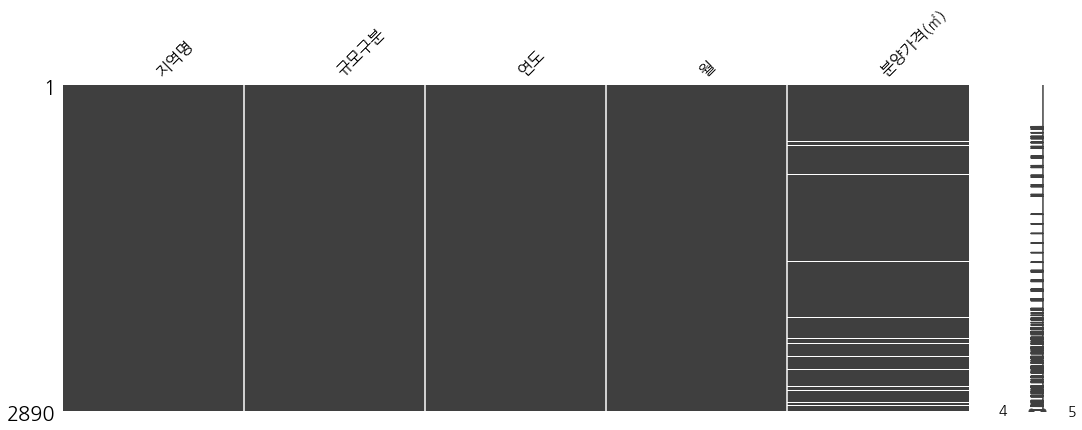

In [37]:
# 결측치 보기
import missingno as msno
msno.matrix(pre_sale, figsize=(18,6))

In [38]:
# 연도와 월은 카테고리 형태의 데이터이기 때문에 스트링 형태로 변경
pre_sale['연도'] = pre_sale['연도'].astype(str)
pre_sale['월'] = pre_sale['월'].astype(str)

In [39]:
pre_sale_price = pre_sale['분양가격(㎡)']

In [43]:
# 분양가격의 타입을 숫자로 변경해 줍니다.
pre_sale['분양가격'] = pd.to_numeric(pre_sale_price, errors='coerce')
# 평당 분양가격을 구해볼까요.
pre_sale['평당분양가격'] = pre_sale['분양가격'] * 3.3

In [44]:
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 7 columns):
지역명        2890 non-null object
규모구분       2890 non-null object
연도         2890 non-null object
월          2890 non-null object
분양가격(㎡)    2750 non-null object
분양가격       2658 non-null float64
평당분양가격     2658 non-null float64
dtypes: float64(2), object(5)
memory usage: 158.1+ KB


In [45]:
pre_sale.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    140
분양가격       232
평당분양가격     232
dtype: int64

In [46]:
pre_sale.describe()

,분양가격,평당분양가격
count,2658.000000,2658.000000
mean,3063.297216,10108.880813
std,1112.743769,3672.054436
min,1868.000000,6164.400000
25%,2348.000000,7748.400000
50%,2743.000000,9051.900000
75%,3293.750000,10869.375000
max,8098.000000,26723.400000


In [48]:
pre_sale.describe(include=[np.object])

,지역명,규모구분,연도,월,분양가격(㎡)
count,2890,2890,2890,2890,2750
unique,17,5,4,12,1305
top,대구,전용면적 85㎡초과 102㎡이하,2017,12,2221
freq,170,578,1020,255,17


In [53]:
#연도가 2017년인 데이터만 추출
pre_sale_2017 = pre_sale.loc[pre_sale['연도']=='2017']
pre_sale_2017.head(10)

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
1275,서울,전체,2017,1,6450,6450.0,21285.0
1276,서울,전용면적 60㎡이하,2017,1,6662,6662.0,21984.6
1277,서울,전용면적 60㎡초과 85㎡이하,2017,1,6500,6500.0,21450.0
1278,서울,전용면적 85㎡초과 102㎡이하,2017,1,7030,7030.0,23199.0
1279,서울,전용면적 102㎡초과,2017,1,6771,6771.0,22344.3
1280,인천,전체,2017,1,3132,3132.0,10335.6
1281,인천,전용면적 60㎡이하,2017,1,3181,3181.0,10497.3
1282,인천,전용면적 60㎡초과 85㎡이하,2017,1,3137,3137.0,10352.1
1283,인천,전용면적 85㎡초과 102㎡이하,2017,1,3275,3275.0,10807.5
1284,인천,전용면적 102㎡초과,2017,1,4201,4201.0,13863.3


In [54]:
pre_sale['지역명'].value_counts()

대구    170
경북    170
충북    170
울산    170
인천    170
부산    170
전북    170
서울    170
전남    170
경기    170
광주    170
대전    170
세종    170
경남    170
충남    170
제주    170
강원    170
Name: 지역명, dtype: int64

## groupby 와 pivot테이블이용

In [62]:
#groupby 함수 메뉴얼
pre_sale.groupby?

In [72]:
# 분양가격만 봤을 때 2015년에서 2018년으로 갈수록 오른 것을 확인할 수 있습니다.
pd.options.display.float_format = '{:,.0f}'.format
pre_sale.groupby(pre_sale.연도).describe().T

연도             2015   2016   2017   2018
분양가격   count    243    984    899    532
       mean   2,789  2,934  3,140  3,299
       std      977  1,071  1,108  1,196
       min    1,868  1,900  1,976  2,076
       25%    2,225  2,282  2,365  2,471
       50%    2,516  2,672  2,849  2,914
       75%    3,026  3,148  3,456  3,647
       max    7,092  8,096  7,887  8,098
평당분양가격 count    243    984    899    532
       mean   9,203  9,683 10,360 10,885
       std    3,224  3,536  3,655  3,947
       min    6,164  6,270  6,521  6,851
       25%    7,342  7,531  7,804  8,154
       50%    8,303  8,818  9,402  9,616
       75%    9,984 10,390 11,405 12,036
       max   23,404 26,717 26,027 26,723

In [68]:
pre_sale.pivot_table?

In [69]:
pre_sale.pivot_table('평당분양가격', '규모구분', '연도')

연도,2015,2016,2017,2018
규모구분,,,,
전용면적 102㎡초과,"9,837","10,389","11,334","11,235"
전용면적 60㎡이하,"8,952","9,399","10,246","10,912"
전용면적 60㎡초과 85㎡이하,"8,892","9,296","9,825","10,464"
전용면적 85㎡초과 102㎡이하,"9,519","10,122","10,540","11,483"
전체,"8,893","9,293","9,901","10,563"


In [73]:
# 규모구분에서 전체로 되어있는 데이터만 가져온다.
region_year_all = pre_sale.loc[pre_sale['규모구분'] == '전체']
region_year = region_year_all.pivot_table('평당분양가격', '지역명', '연도').reset_index()
region_year

연도,지역명,2015,2016,2017,2018
0,강원,"7,160","7,011","7,127","7,641"
1,경기,"10,377","11,220","11,850","12,881"
2,경남,"7,586","7,848","8,120","8,894"
3,경북,"7,171","7,361","7,795","8,342"
4,광주,"8,052","8,899","9,464","9,638"
5,대구,"9,232","10,310","11,456","11,737"
6,대전,"8,098","8,502","9,045","9,604"
7,부산,"10,307","10,430","11,578","12,756"
8,서울,"19,725","20,663","21,376","22,329"
9,세종,"8,750","8,860","9,135","10,375"


In [74]:
region_year['변동액'] = (region_year['2018'] - region_year['2015']).astype(int)
max_delta_price = np.max(region_year['변동액'])*1000
min_delta_price = np.min(region_year['변동액'])*1000
mean_delta_price = np.mean(region_year['변동액'])*1000

print('2015년부터 2018년까지 분양가는 계속 상승했으며, 상승액이 가장 큰 지역은 제주이며 상승액은 평당 {:,.0f}원이다.'.format(max_delta_price))
print('상승액이 가장 작은 지역은 울산이며 평당 {:,.0f}원이다.'.format(min_delta_price))
print('하지만 나중에 살펴보겠지만 울산에는 결측치가 많다. 따라서 변동액이 가장 작다라고 판단하기 어렵다.')
print('전국 평균 변동액은 평당 {:,.0f}원이다.'.format(mean_delta_price))

region_year

2015년부터 2018년까지 분양가는 계속 상승했으며, 상승액이 가장 큰 지역은 제주이며 상승액은 평당 5,087,000원이다.
상승액이 가장 작은 지역은 울산이며 평당 369,000원이다.
하지만 나중에 살펴보겠지만 울산에는 결측치가 많다. 따라서 변동액이 가장 작다라고 판단하기 어렵다.
전국 평균 변동액은 평당 1,669,588원이다.


연도,지역명,2015,2016,2017,2018,변동액
0,강원,"7,160","7,011","7,127","7,641",481
1,경기,"10,377","11,220","11,850","12,881",2503
2,경남,"7,586","7,848","8,120","8,894",1308
3,경북,"7,171","7,361","7,795","8,342",1171
4,광주,"8,052","8,899","9,464","9,638",1585
5,대구,"9,232","10,310","11,456","11,737",2504
6,대전,"8,098","8,502","9,045","9,604",1506
7,부산,"10,307","10,430","11,578","12,756",2449
8,서울,"19,725","20,663","21,376","22,329",2603
9,세종,"8,750","8,860","9,135","10,375",1624


/root/anaconda3/lib/python3.6/site-packages/plotnine/layer.py:449: UserWarning: geom_bar : Removed 17 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


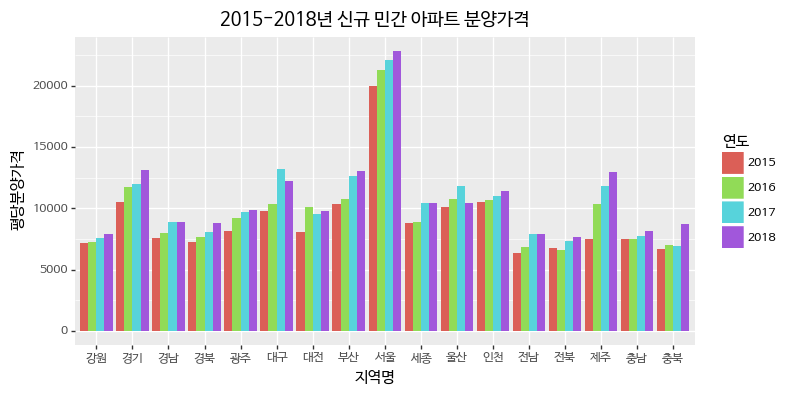

<ggplot: (-9223363246884140263)>

In [78]:
(ggplot(region_year_all, aes(x='지역명', y='평당분양가격', fill='연도'))
 + geom_bar(stat='identity', position='dodge')
 + ggtitle('2015-2018년 신규 민간 아파트 분양가격')
 + theme(text=element_text(family='NanumBarunGothic'),
         figure_size=(8, 4))
)

In [80]:
pre_sale.pivot_table('평당분양가격', '규모구분', '지역명')

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
규모구분,,,,,,,,,,,,,,,,,
전용면적 102㎡초과,"7,899","13,647","9,226","8,616","10,296","12,334","14,282","12,590","22,058","9,292","9,974","13,836","7,568","7,842","10,416","8,478","7,933"
전용면적 60㎡이하,"7,195","12,385","8,343","7,661","8,518","11,285","8,798","10,707","22,046","9,107","8,965","10,870","6,991","7,232","14,700","7,782","6,969"
전용면적 60㎡초과 85㎡이하,"7,228","11,691","8,110","7,690","9,176","10,931","8,807","11,191","20,781","9,272","10,641","10,748","6,968","6,891","9,943","7,504","7,044"
전용면적 85㎡초과 102㎡이하,"7,686","12,130","9,822","8,776","9,296","9,589","9,037","11,039","23,754","9,245","8,861","11,267","7,882","7,770","10,739","9,090","8,171"
전체,"7,197","11,706","8,137","7,696","9,167","10,897","8,880","11,295","21,169","9,263","10,619","10,739","6,982","6,902","10,253","7,494","6,994"


/root/anaconda3/lib/python3.6/site-packages/plotnine/layer.py:449: UserWarning: geom_bar : Removed 232 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


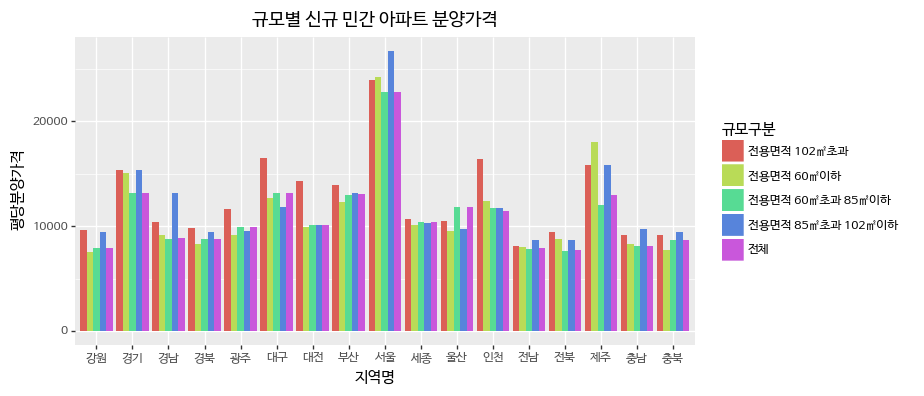

<ggplot: (8789970753207)>

In [82]:
# 서울의 경우 전용면적 85㎡초과 102㎡이하가 분양가격이 가장 비싸게 나옵니다.
(ggplot(pre_sale, aes(x='지역명', y='평당분양가격', fill='규모구분'))
 + geom_bar(stat='identity', position='dodge')
 + ggtitle('규모별 신규 민간 아파트 분양가격')
 + theme(text=element_text(family='NanumBarunGothic'),
         figure_size=(8, 4))
)

/root/anaconda3/lib/python3.6/site-packages/plotnine/layer.py:449: UserWarning: geom_bar : Removed 232 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


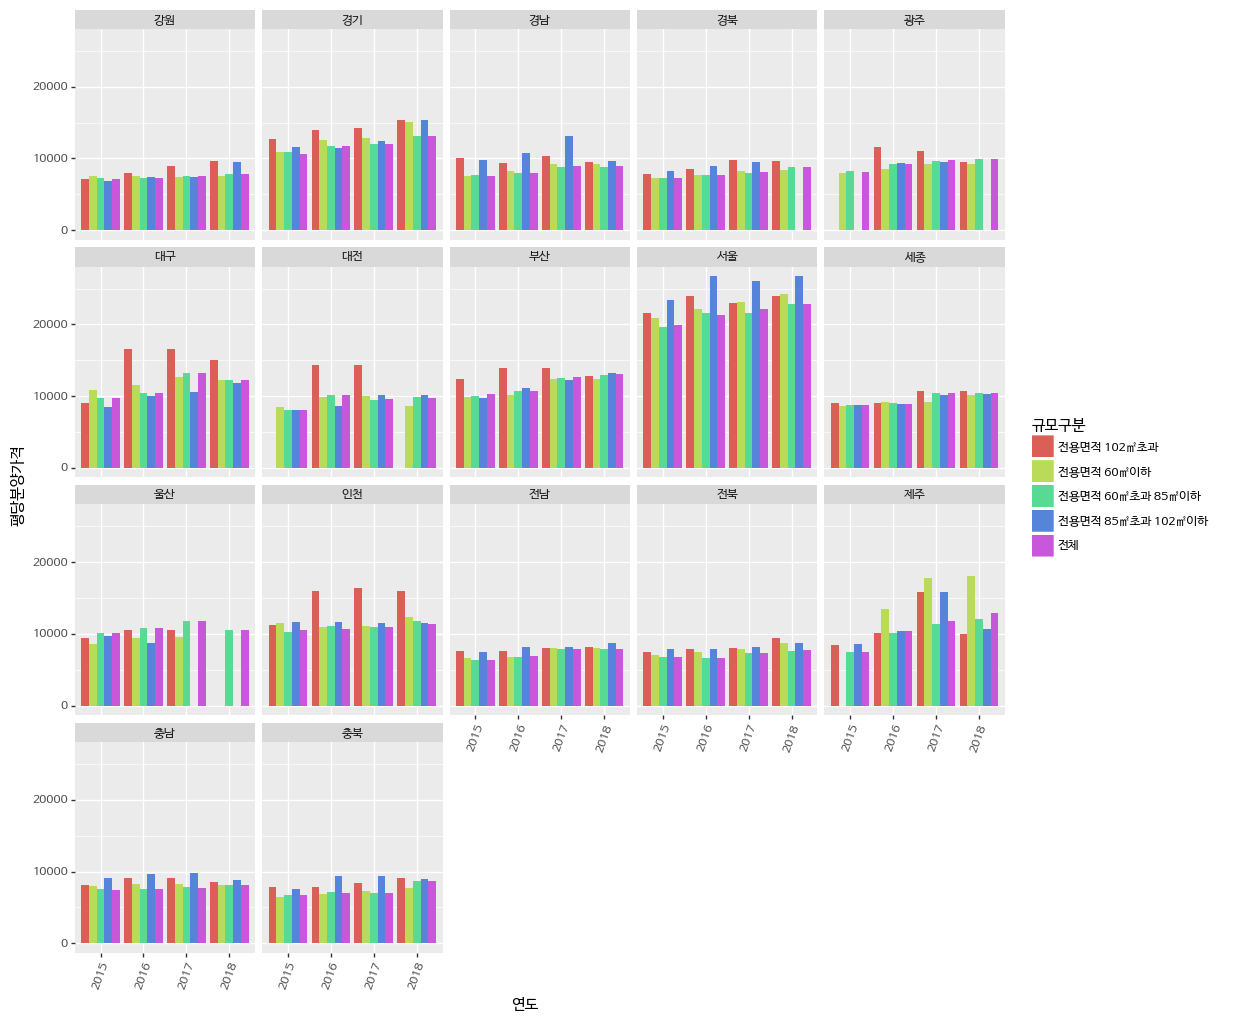

<ggplot: (-9223363246884253773)>

In [83]:
# 위에 그린 그래프를 지역별로 나눠 봅니다.
(ggplot(pre_sale)
 + aes(x='연도', y='평당분양가격', fill='규모구분')
 + geom_bar(stat='identity', position='dodge')
 + facet_wrap('지역명')
 + theme(text=element_text(family='NanumBarunGothic'),
         axis_text_x=element_text(rotation=70),
         figure_size=(12, 12))
)

/root/anaconda3/lib/python3.6/site-packages/plotnine/layer.py:360: UserWarning: stat_boxplot : Removed 232 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


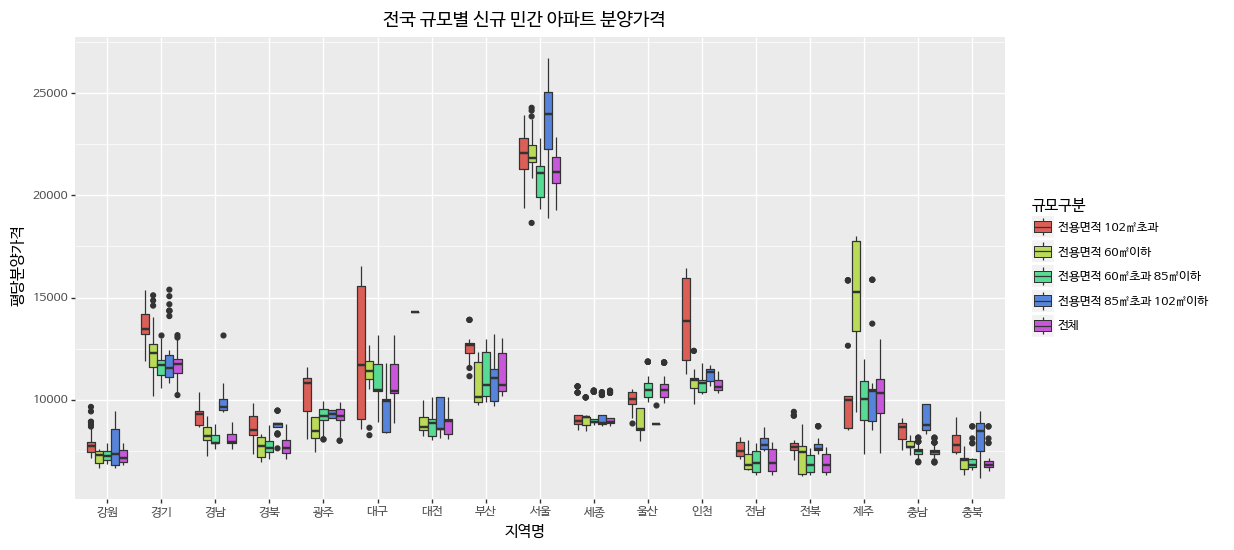

<ggplot: (8789970032462)>

In [84]:
# 박스플롯을 그려봅니다.
(ggplot(pre_sale, aes(x='지역명', y='평당분양가격', fill='규모구분'))
 + geom_boxplot()
 + ggtitle('전국 규모별 신규 민간 아파트 분양가격')
 + theme(text=element_text(family='NanumBarunGothic'),
         figure_size=(12, 6))
)

/root/anaconda3/lib/python3.6/site-packages/plotnine/layer.py:360: UserWarning: stat_boxplot : Removed 5 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


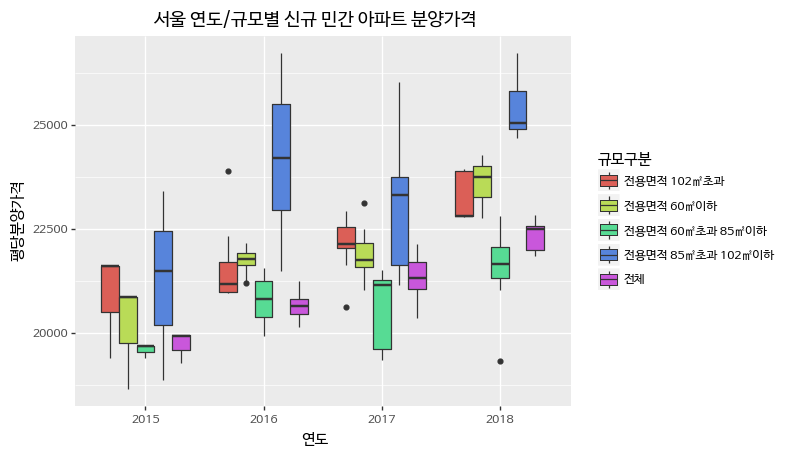

<ggplot: (8789969369285)>

In [85]:
pre_sale_seoul = pre_sale.loc[pre_sale['지역명']=='서울']
(ggplot(pre_sale_seoul)
 + aes(x='연도', y='평당분양가격', fill='규모구분')
 + ggtitle('서울 연도/규모별 신규 민간 아파트 분양가격')
 + geom_boxplot()
 + theme(text=element_text(family='NanumBarunGothic'))
)

/root/anaconda3/lib/python3.6/site-packages/plotnine/layer.py:360: UserWarning: stat_boxplot : Removed 25 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


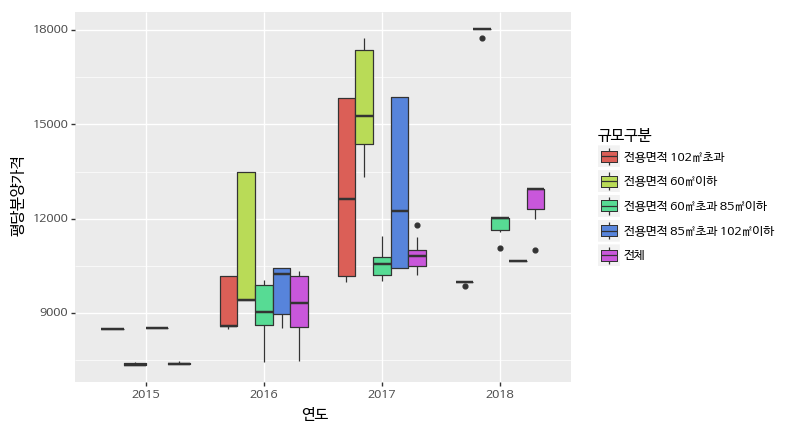

<ggplot: (8789963849287)>

In [86]:
# 2015년에서 2018년까지 분양가 차이가 가장 컸던 제주를 봅니다.
(ggplot(pre_sale.loc[pre_sale['지역명']=='제주'])
 + aes(x='연도', y='평당분양가격', fill='규모구분')
 + geom_boxplot()
 + theme(text=element_text(family='NanumBarunGothic'))
)

/root/anaconda3/lib/python3.6/site-packages/plotnine/layer.py:360: UserWarning: stat_boxplot : Removed 41 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


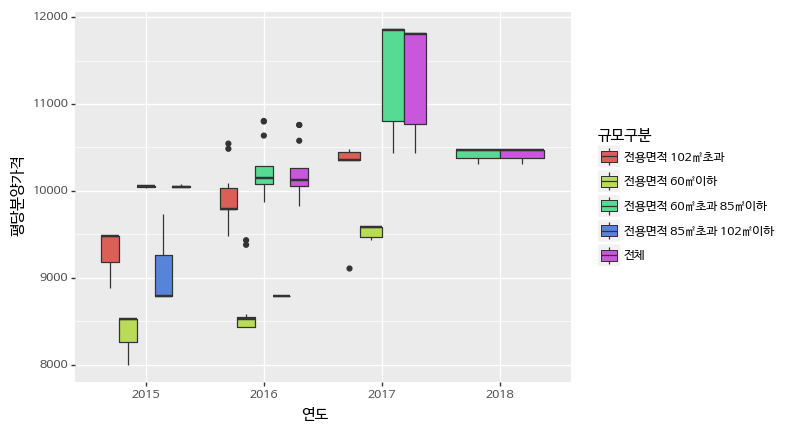

<ggplot: (-9223363246890929159)>

In [87]:
# 2015년에서 2018년까지 분양가 차이가 가장 작았던 울산을 봅니다.
# 실제로는 분양가 차이가 적은 것이 아니라 결측치로 인해 분양가 차이가 적게 보였습니다.
(ggplot(pre_sale.loc[pre_sale['지역명']=='울산'])
 + aes(x='연도', y='평당분양가격', fill='규모구분')
 + geom_boxplot()
 + theme(text=element_text(family='NanumBarunGothic'))
)